In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_excel("Project.xlsx")
fp = 'wojewodztwa_mapa\wojewodztwa.shp'
map_df = gpd.read_file(fp)
nazwy = ["Śląskie", "Opolskie", "Wielkopolskie", "Zachodniopomorskie", "Świętokrzyskie","Kujawsko-Pomorskie", "Podlaskie","Dolnośląskie", "Podkarpackie","Małopolskie", "Pomorskie", "Warmińsko-Mazurskie", "Łódzkie", "Mazowieckie", "Lubelskie", "Lubuskie" ]
map_df["JPT_NAZWA_"] = nazwy
#map_df.plot()

In [8]:
merged = map_df.set_index("JPT_NAZWA_").join(data.set_index("Województwo"))
Paleta = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
#merged["Liczba testów na 1000 mieszkańców:"]

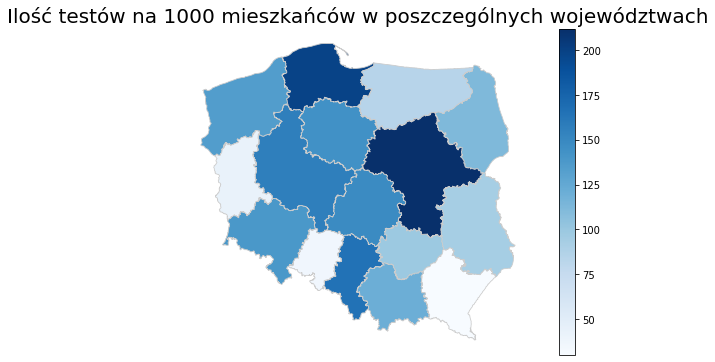

In [9]:
variable = "Liczba testów na 1000 mieszkańców:"
vmin, vmax = 30, 212
fig, ax = plt.subplots(1, figsize=(10, 6))

merged.plot(column=variable, cmap="Blues", linewidth=0.8, ax=ax, edgecolor="0.8")
ax.axis("off")
ax.set_title("Ilość testów na 1000 mieszkańców w poszczególnych województwach", fontdict={"fontsize": "20", "fontweight" : "2"})
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)